In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [3]:
hours = df['Time']/3600
hours = hours.astype(int)
df['Hours'] = hours

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hours     0
dtype: int64

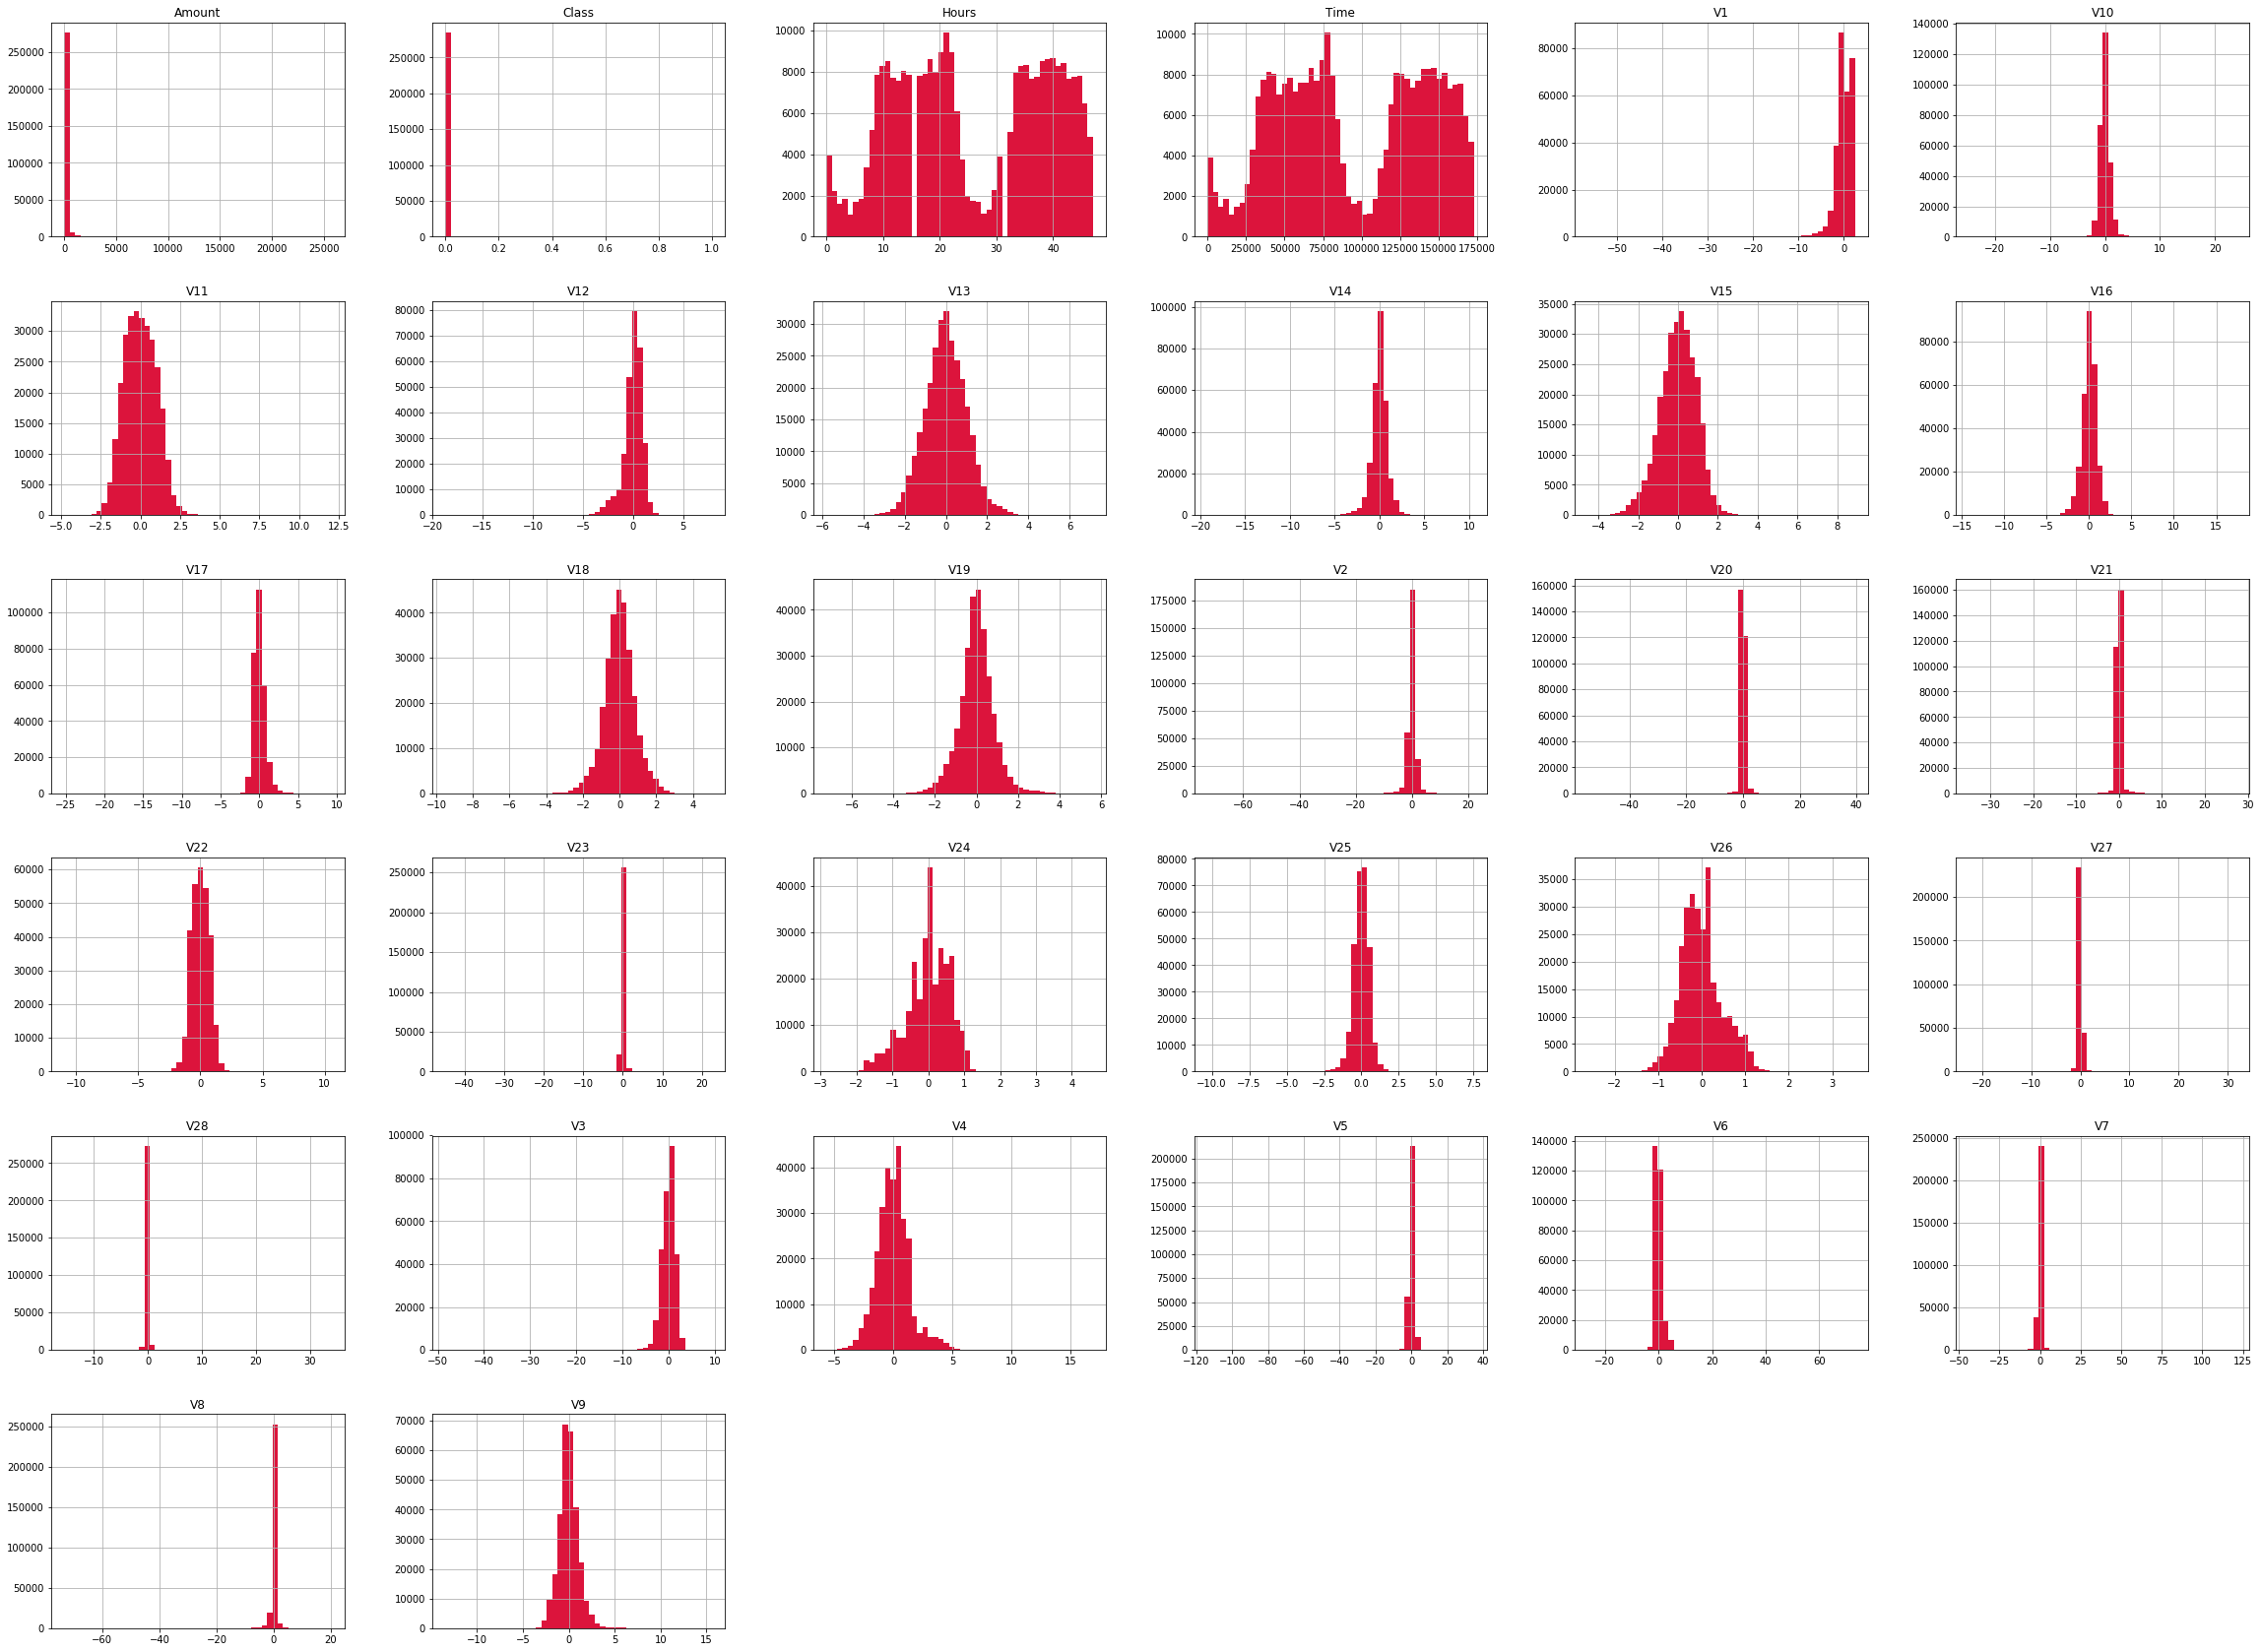

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist (bins=50, figsize=(40,30), color = 'crimson')

plt.show()

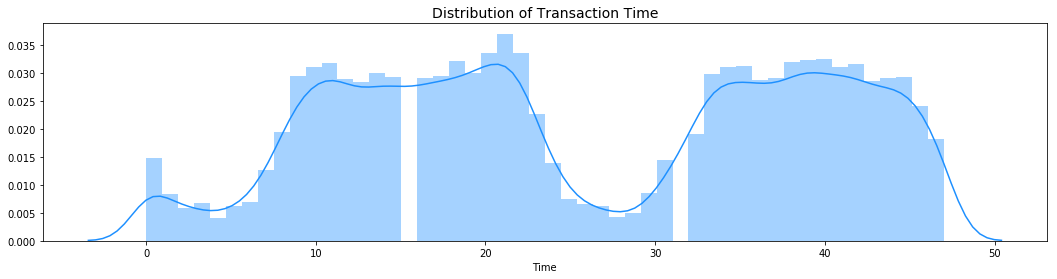

In [6]:


fig, ax = plt.subplots(1 , figsize=(18,4))
sns.distplot(hours, color='dodgerblue', bins = 50)
ax.set_title('Distribution of Transaction Time', fontsize=14)



plt.show()

In [7]:
a= len(df[df['Class'] == 0] )
print ("Amount of Non Fraud transactions = " , a)
b = len(df[df['Class'] == 1])
print ("Amount of Fraud transactions = " ,b )

Amount of Non Fraud transactions =  284315
Amount of Fraud transactions =  492


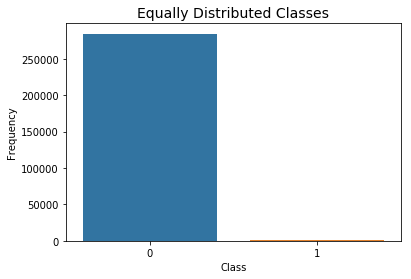

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot('Class', data=df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.ylabel("Frequency")
plt.show()

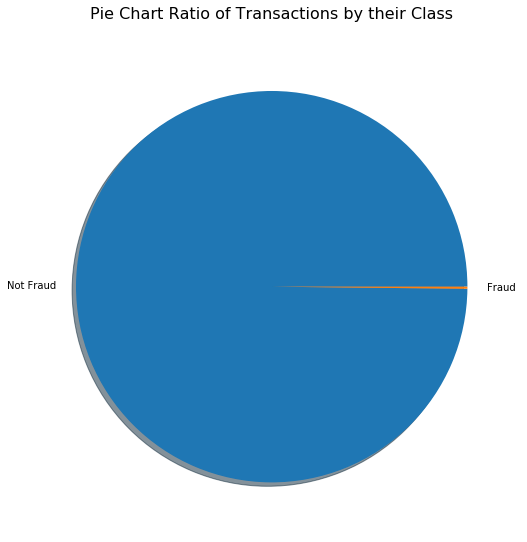

In [9]:

ratio = [ a, b] 
title = "Not Fraud" , "Fraud"

plt.figure(figsize=(9,9))
plt.pie(ratio, labels= title, shadow=True, startangle=0)
plt.title('Pie Chart Ratio of Transactions by their Class\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE

# Separate input features and target
Y = df.Class
X = df.drop(['Time','Class',], axis=1)

# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2727)

sm = SMOTE(random_state=2727, ratio=1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

Using TensorFlow backend.


In [11]:
X_train = pd.DataFrame(data=X_train)
X_train.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Hours']
Y_train = pd.DataFrame(data = Y_train)
Y_train.columns = ['Class']


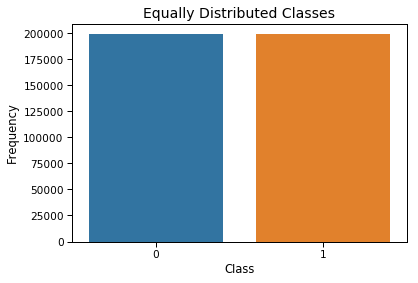

In [12]:
sns.countplot('Class', data=Y_train)
plt.title('Equally Distributed Classes', fontsize=14)
plt.ylabel("Frequency")
plt.show()

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
smote = XGBClassifier()
smote.fit(X_train, Y_train)

# Predict on test
smote_pred = smote.predict(X_test)
# predict probabilities
probs = smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
accuracy = accuracy_score(Y_test, smote_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 99.39%


In [15]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()
log_model.fit(X_train, Y_train)
prediction=log_model.predict(X_test)
score= accuracy_score(Y_test, prediction)
print("Test Accuracy is" , score*100)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy is 98.68450311903842


In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train , Y_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
pred=clf.predict(X_test)
sc= accuracy_score(Y_test, pred)
print("Test accuracy is " , sc*100)

Test accuracy is  99.94733330992591
